In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', 100)
pd.set_option("display.max_colwidth", 500)

worker_profile_fpath = "../data/IPM_worker_profile.csv"
worker_quality_fpath = "../data/IPM_worker_quality.csv"
df_profile = pd.read_csv(worker_profile_fpath)
df_quality = pd.read_csv(worker_quality_fpath)
df_quality

,unit_id,counts
0,unit_72,11
1,unit_90,11
2,unit_195,11
3,unit_96,11
4,unit_179,11
...,...,...
195,unit_177,1
196,unit_121,1
197,unit_112,1
198,unit_186,1


In [20]:
# get profile data of high quality workers
# high quality workers are those who give 5 or more judgements that are exactly the same as ground truth
# here, the threshold 5 is chosen as the media of counts in df_quality
df_merge = pd.merge(df_profile, df_quality, on="unit_id")
df_hq_workers = df_merge.loc[df_merge["counts"] >= 5] # median counts df_quality
df_hq_workers = df_hq_workers.sort_values(by="counts", ascending=False)
print(df_profile.shape, df_hq_workers.shape)
df_hq_workers.head()

(200, 27) (120, 28)


,unit_id,q_0_age_answer,q_0_school_answer,q_0_taxes_answer,q_0_political_views_answer,q_0_consideration_answer,q_0_southern_border_answer,q_0_environment_answer,q_0_age_value,q_0_school_value,q_0_taxes_value,q_0_political_views_value,q_0_consideration_value,q_0_southern_border_value,q_0_environment_value,q_1_farmers_score,q_2_marks_score,q_3_athletics_score,overall_crt_score,q_0_time_elapsed,q_1_time_elapsed,q_2_time_elapsed,q_3_time_elapsed,q_0_accesses,q_1_accesses,q_2_accesses,q_3_accesses,counts
144,unit_90,26-35,High school graduate or GED (includes technical/vocational training that doesn’t towards college credit),"75,000 to less than 100,000",Conservative,Republican,Disagree,Agree,2.0,1.0,6.0,1.0,0.0,1.0,0.0,0,0,0,0,24.55,9.46,8.70,18.81,1,1,1,1,11
89,unit_179,36-50,"Postgraduate or professional degree, including master’s, doctorate, medical or law degree","150,000 or more",Liberal,Democrat,Agree,Agree,3.0,5.0,8.0,3.0,1.0,0.0,0.0,1,0,0,1,70.55,17.92,51.19,60.08,1,1,1,1,11
147,unit_96,19-25,High school graduate or GED (includes technical/vocational training that doesn’t towards college credit),"40,000 to less than 50,000",Moderate,Independent,Disagree,Agree,1.0,1.0,4.0,2.0,2.0,1.0,0.0,1,0,0,1,17.81,7.78,7.10,17.00,1,1,1,1,11
135,unit_72,26-35,Four year college degree/bachelor’s degree,"50,000 to less than 75,000",Liberal,Democrat,Disagree,Agree,2.0,3.0,5.0,3.0,1.0,1.0,0.0,0,0,0,0,302.79,150.47,19.03,47.81,1,1,1,1,11
97,unit_195,26-35,Four year college degree/bachelor’s degree,"100,000 to less than 150,000",Liberal,Democrat,Disagree,Agree,2.0,3.0,7.0,3.0,1.0,1.0,0.0,0,1,0,1,95.32,30.73,120.07,181.48,1,1,1,1,11


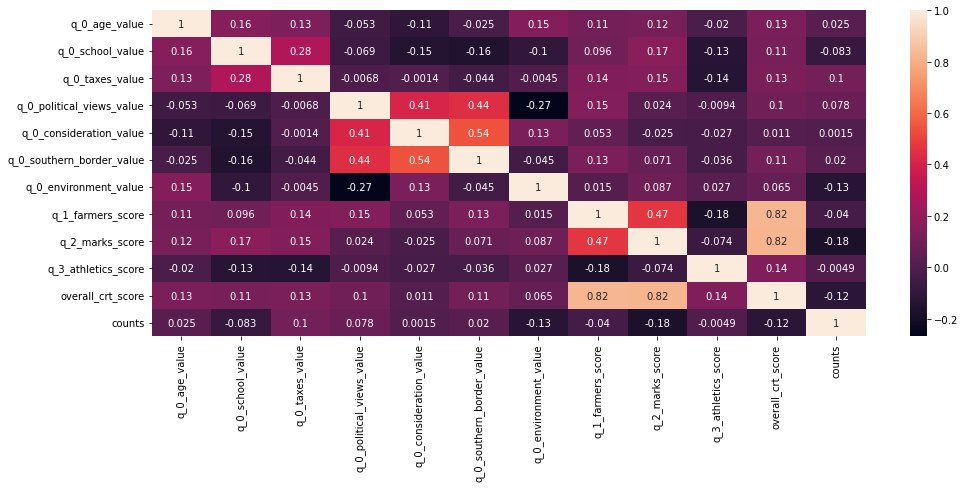

In [23]:
df_corr = df_hq_workers[[
    "q_0_age_value", 
    "q_0_school_value", 
    "q_0_taxes_value",
    "q_0_political_views_value",
    "q_0_consideration_value",
    "q_0_southern_border_value",
    "q_0_environment_value",
    "q_1_farmers_score",
    "q_2_marks_score",
    "q_3_athletics_score",
    "overall_crt_score",
    "counts"
]].corr()

plt.figure(figsize=(16, 6))
sns.heatmap(df_corr, annot=True)
plt.show()